# Read basic data 

In [234]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import math 

df = pd.read_csv('data/GSPC.csv')
# df = df.sort_values('Date')

df.shape


(4723, 7)

In [235]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [236]:
df.Open.values

array([1469.25    , 1455.219971, 1399.420044, ..., 2902.540039,
       2877.530029, 2882.51001 ])

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 7 columns):
Date         4723 non-null object
Open         4723 non-null float64
High         4723 non-null float64
Low          4723 non-null float64
Close        4723 non-null float64
Adj Close    4723 non-null float64
Volume       4723 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 258.4+ KB


In [238]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4723.000000,4723.000000,4723.000000,4723.000000,4723.000000,4.723000e+03
mean,1490.391028,1498.963225,1481.159353,1490.577815,1490.577815,3.055488e+09
std,497.218669,497.378162,497.080972,497.342663,497.342663,1.504790e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1140.525024,1148.054993,1132.520019,1140.554993,1140.554993,1.598750e+09
50%,1331.910034,1340.890015,1324.969971,1331.939941,1331.939941,3.155080e+09
75%,1834.179993,1842.630005,1825.084961,1834.784973,1834.784973,3.917190e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


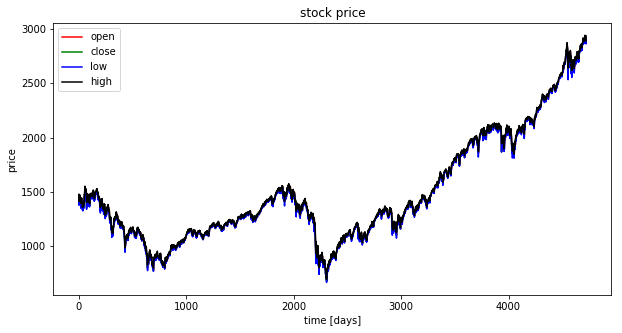

In [239]:
plt.figure(figsize=(10, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

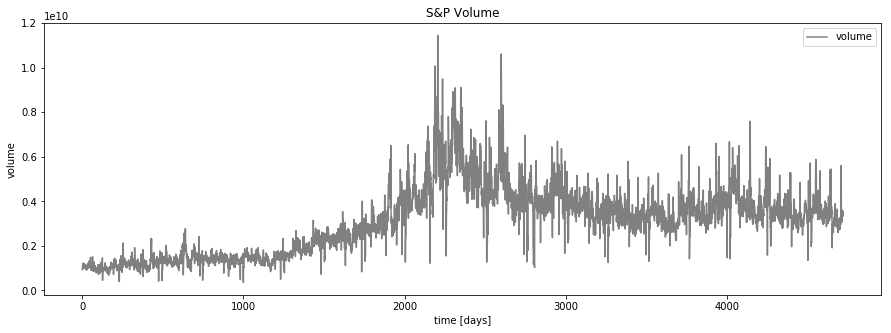

In [240]:
plt.figure(figsize=(15, 5));
plt.plot(df.Volume.values, color='gray', label='volume')
plt.title('S&P Volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')
plt.show()

In [241]:
df.Open.values

array([1469.25    , 1455.219971, 1399.420044, ..., 2902.540039,
       2877.530029, 2882.51001 ])

# Data manipulation

In [242]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

In [243]:
df = normalize_data(df)
df.drop(['Volume'],1,inplace=True)
df.drop(['Date'],1,inplace=True)
# remove adj close
df = df.drop('Adj Close', axis=1)
df.head()

,Open,High,Low,Close
0,0.349934,0.348555,0.341354,0.345437
1,0.343720,0.338411,0.323246,0.320683
2,0.319002,0.319731,0.314509,0.321876
3,0.320193,0.319121,0.320888,0.322471
4,0.320787,0.332288,0.324706,0.339337


In [244]:
val_set_percent = 10
test_set_percent = 10
seq_len = 20

In [245]:
# function to create train, validation, test data given stock data and sequence length

def load_data(inputdata, seq_len):
    data_raw = inputdata.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len (shape is (seq_len, n_feats) * data range)
    for i in range(len(data_raw) - seq_len): 
        data.append(data_raw[i: i + seq_len])
    
    # convert to arrays
    data = np.array(data);   # this has a shape of (4703, 20, 6)
    
    # size of validation, train and test set
    valid_set_size = int(np.round(val_set_percent/100*data.shape[0]));
    test_set_size  = int(np.round(test_set_percent/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]
    


In [246]:
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(inputdata=df, seq_len = seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (3763, 19, 4)
y_train.shape =  (3763, 4)
x_valid.shape =  (470, 19, 4)
y_valid.shape =  (470, 4)
x_test.shape =  (470, 19, 4)
y_test.shape =  (470, 4)


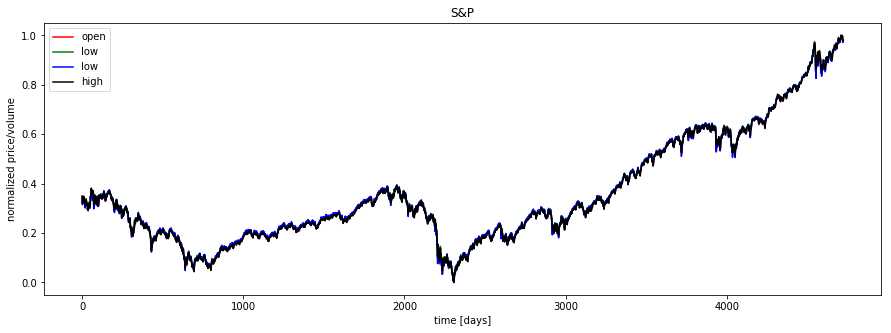

In [247]:
df  = normalize_data(df)

# plot normalized curves

plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='low')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('S&P')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

# Modeling a RNN with (LSTM / GRU cells)

In [248]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
# random array of train set
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

perm_array.shape


# function to get the next batch data
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]
    

    
# x_train, y_train = get_next_batch(batch_size=50)

# x_train.shape
# y_train.shape


In [249]:
# parameters
n_steps = seq_len-1 
n_inputs = 4
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
# layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
#           for layer in range(n_layers)]

# use Basic LSTM Cell 
# tf.nn.elu are exponential linear units
layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
         for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)


stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

In [250]:
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 

        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.030295/0.147841
5.00 epochs: MSE train/valid = 0.000159/0.000264
9.99 epochs: MSE train/valid = 0.000116/0.000220
14.99 epochs: MSE train/valid = 0.000083/0.000130
19.98 epochs: MSE train/valid = 0.000065/0.000097
24.98 epochs: MSE train/valid = 0.000052/0.000081
29.98 epochs: MSE train/valid = 0.000062/0.000137
34.97 epochs: MSE train/valid = 0.000034/0.000050
39.97 epochs: MSE train/valid = 0.000031/0.000043
44.96 epochs: MSE train/valid = 0.000027/0.000048
49.96 epochs: MSE train/valid = 0.000030/0.000067
54.96 epochs: MSE train/valid = 0.000024/0.000048
59.95 epochs: MSE train/valid = 0.000024/0.000047
64.95 epochs: MSE train/valid = 0.000027/0.000066
69.94 epochs: MSE train/valid = 0.000024/0.000050
74.94 epochs: MSE train/valid = 0.000021/0.000038
79.94 epochs: MSE train/valid = 0.000025/0.000043
84.93 epochs: MSE train/valid = 0.000022/0.000044
89.93 epochs: MSE train/valid = 0.000039/0.000181
94.92 epochs: MSE train/valid = 0.000026/0.000071
99.

# Predictions

In [251]:
y_train.shape[0]

3763

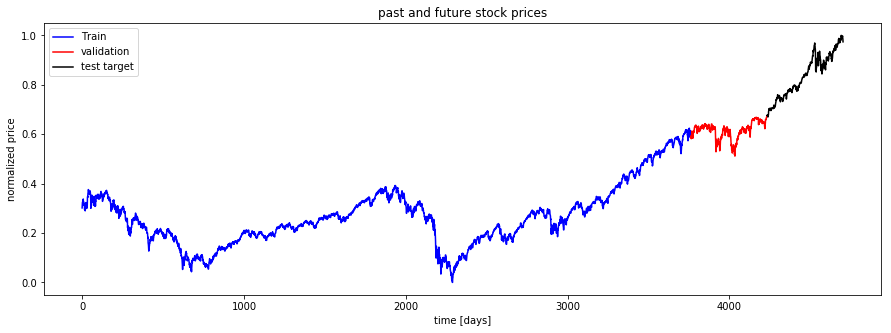

In [252]:
ft= 0 # open prices

plt.figure(figsize=(15, 5));

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='Train')
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft], color='red', label='validation')
plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0], y_train.shape[0]+y_test.shape[0]+y_test.shape[0]), 
         y_test[:,ft], color='black', label='test target')


plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

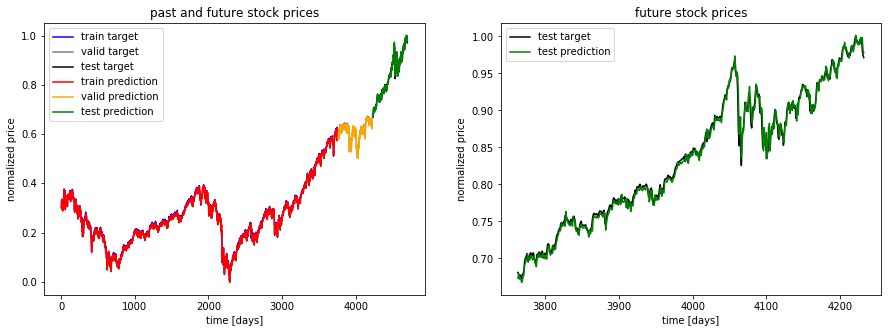

In [253]:
ft = 2  # 2 is closing price

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');


plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');